# 2A

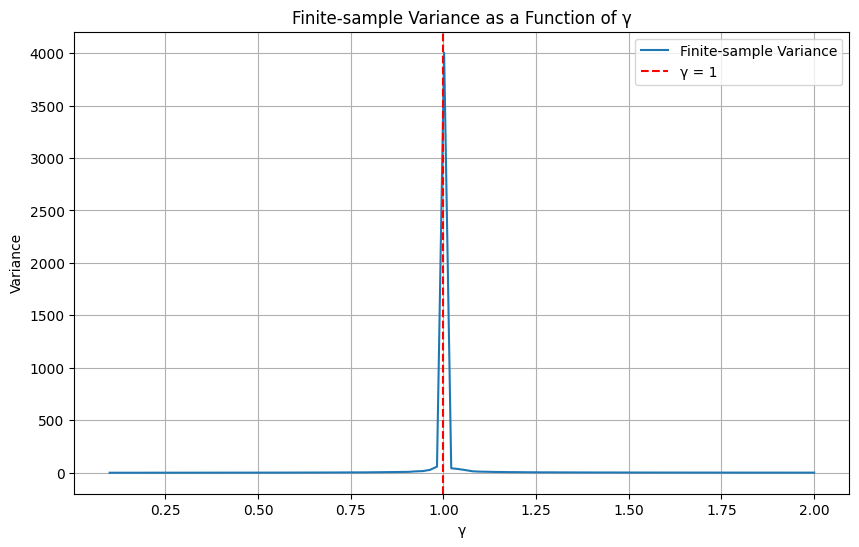

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Constants given in the problem
n = 200  # Fixed number of samples
gamma_values = np.linspace(0.1, 2, 100)  # Gamma values range
sigma_squared = 1  # Assuming noise variance σ² = 1

# Function to compute the finite-sample variance according to the formula
def compute_finite_sample_variance(n, d, sigma_squared):
    iden = np.identity(d)
    Z = np.random.normal(0, 1, (n, d))
    X= Z@iden
    Sigma_hat = (X.T @ X) / n
    Sigma_hat_pinv = np.linalg.pinv(Sigma_hat)
    V_beta_hat = (sigma_squared / n) * np.trace(Sigma_hat_pinv)#Sigma matrix=I here
    return V_beta_hat

# Compute finite-sample variances for each gamma value
finite_sample_variances = [compute_finite_sample_variance(n, int(np.floor(gamma * n)), sigma_squared) for gamma in gamma_values]

# Plotting the finite-sample variance as a function of gamma
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, finite_sample_variances, label='Finite-sample Variance')
plt.axvline(x=1, color='r', linestyle='--', label='γ = 1')
plt.xlabel('γ')
plt.ylabel('Variance')
plt.title('Finite-sample Variance as a Function of γ')
plt.legend()
plt.grid(True)
plt.show()

# 2 b

Find the parameters

In [50]:
# Monte Carlo integration to estimate a1 for the tanh activation function
def monte_carlo_integration_for_a1(num_samples=1000000):
    samples = np.random.standard_normal(num_samples)
    integrand_values = np.tanh(samples)**2
    integral_estimate = np.mean(integrand_values)
    return np.sqrt(1 / integral_estimate)

# Estimate a1 using Monte Carlo integration
a1 = monte_carlo_integration_for_a1()
print(a1)
pai=np.pi
b2 = 1/np.sqrt(2 * pai)
a2 = np.sqrt(2 * pai / (2 * pai - 1))
print(a2,b2)
a3 = np.sqrt(pai / (pai + 2))
b3 = 2 / np.sqrt(2 * pai)
print(a3,b3)

1.5923501445436181
1.0905410359578063 0.3989422804014327
0.7816747855416966 0.7978845608028654


Plot

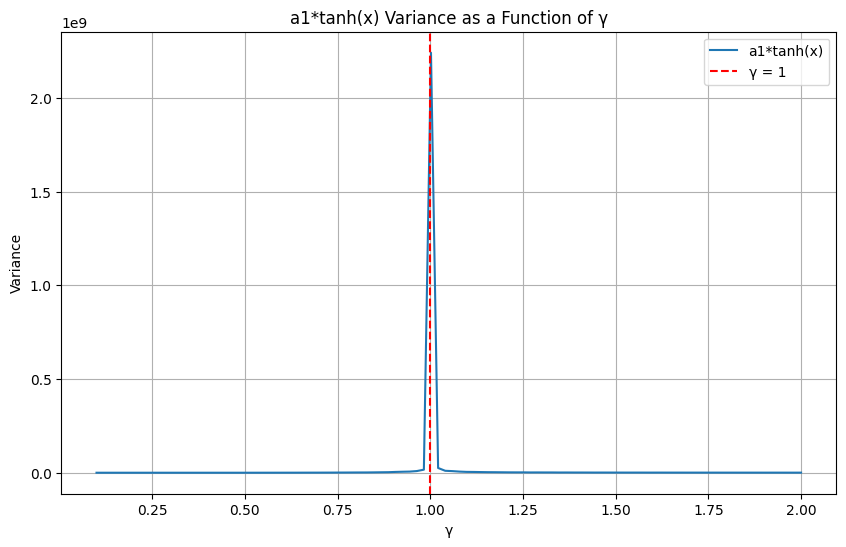

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Constants given in the problem
n = 200  # Fixed number of samples
gamma_values = np.linspace(0.1, 2, 100)  # Gamma values range
sigma_squared = 1  # Assuming noise variance σ² = 1
k=100
# Function to compute the finite-sample variance according to the formula
def compute_finite_sample_variance1(n, d,k, sigma_squared):
    iden = np.identity(k)
    Z = np.random.normal(0, 1, (n, k))
    W = np.random.normal(0, 1/k, (d, k))
    XX=Z@iden@W.T
    X= a1*(np.tanh(XX))
    Sigma_hat = (X.T @ X) / n
    Sigma_hat_pinv = np.linalg.pinv(Sigma_hat)
    V_beta_hat = (sigma_squared / n) * np.trace(Sigma_hat_pinv)
    return V_beta_hat

# Compute finite-sample variances for each gamma value
finite_sample_variances1 = [compute_finite_sample_variance1(n, int(np.floor(gamma * n)),k, sigma_squared) for gamma in gamma_values]

# Plotting the finite-sample variance as a function of gamma
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, finite_sample_variances1, label='a1*tanh(x)')
plt.axvline(x=1, color='r', linestyle='--', label='γ = 1')
plt.xlabel('γ')
plt.ylabel('Variance')
plt.title('a1*tanh(x) Variance as a Function of γ')
plt.legend()
plt.grid(True)
plt.show()

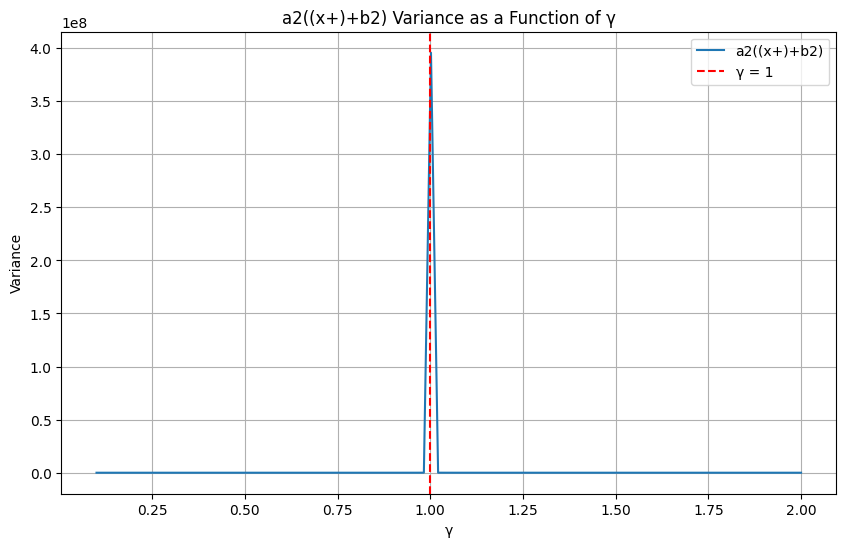

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Constants given in the problem
n = 200  # Fixed number of samples
gamma_values = np.linspace(0.1, 2, 100)  # Gamma values range
sigma_squared = 1  # Assuming noise variance σ² = 1
k=100
# Function to compute the finite-sample variance according to the formula
def compute_finite_sample_variance2(n, d,k, sigma_squared):
    iden = np.identity(k)
    Z = np.random.normal(0, 1, (n, k))
    W = np.random.normal(0, 1/k, (d, k))
    XX=Z@iden@W.T
    X= a2*(np.maximum(XX, 0)- b2)
    Sigma_hat = (X.T @ X) / n
    Sigma_hat_pinv = np.linalg.pinv(Sigma_hat)
    V_beta_hat = (sigma_squared / n) * np.trace(Sigma_hat_pinv)
    return V_beta_hat

# Compute finite-sample variances for each gamma value
finite_sample_variances2 = [compute_finite_sample_variance2(n, int(np.floor(gamma * n)),k, sigma_squared) for gamma in gamma_values]

# Plotting the finite-sample variance as a function of gamma
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, finite_sample_variances2, label='a2((x+)+b2)')
plt.axvline(x=1, color='r', linestyle='--', label='γ = 1')
plt.xlabel('γ')
plt.ylabel('Variance')
plt.title('a2((x+)+b2) Variance as a Function of γ')
plt.legend()
plt.grid(True)
plt.show()

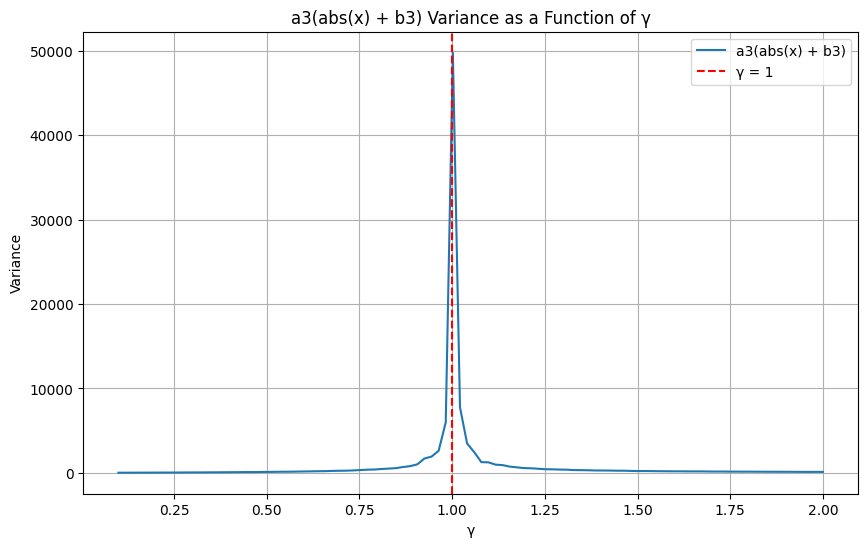

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Constants given in the problem
n = 200  # Fixed number of samples
gamma_values = np.linspace(0.1, 2, 100)  # Gamma values range
sigma_squared = 1  # Assuming noise variance σ² = 1
k=100
# Function to compute the finite-sample variance according to the formula
def compute_finite_sample_variance3(n, d,k, sigma_squared):
    iden = np.identity(k)
    Z = np.random.normal(0, 1, (n, k))
    W = np.random.normal(0, 1/k, (d, k))
    XX=Z@W.T
    X=a3*(abs(XX)- b3)
    Sigma_hat = (X.T @ X) / n
    Sigma_hat_pinv = np.linalg.pinv(Sigma_hat)
    V_beta_hat = (sigma_squared / n) * np.trace(Sigma_hat_pinv)
    return V_beta_hat

# Compute finite-sample variances for each gamma value
finite_sample_variances3 = [compute_finite_sample_variance3(n, int(np.floor(gamma * n)),k, sigma_squared) for gamma in gamma_values]

# Plotting the finite-sample variance as a function of gamma
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, finite_sample_variances3, label='a3(abs(x) + b3)')
plt.axvline(x=1, color='r', linestyle='--', label='γ = 1')
plt.xlabel('γ')
plt.ylabel('Variance')
plt.title('a3(abs(x) + b3) Variance as a Function of γ')
plt.legend()
plt.grid(True)
plt.show()

No, although they have similar shape, their magnitudes are vary different,

# 2C

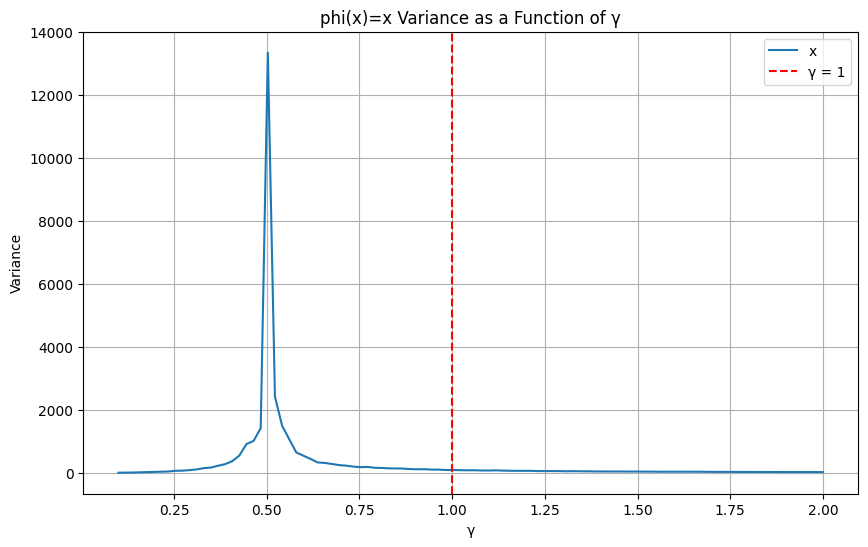

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Constants given in the problem
n = 200  # Fixed number of samples
gamma_values = np.linspace(0.1, 2, 100)  # Gamma values range
sigma_squared = 1  # Assuming noise variance σ² = 1
k=100
# Function to compute the finite-sample variance according to the formula
def compute_finite_sample_variancec(n, d,k, sigma_squared):
    iden = np.identity(k)
    Z = np.random.normal(0, 1, (n, k))
    W = np.random.normal(0, 1/k, (d, k))
    XX=Z@W.T
    X=XX
    Sigma_hat = (X.T @ X) / n
    Sigma_hat_pinv = np.linalg.pinv(Sigma_hat)
    V_beta_hat = (sigma_squared / n) * np.trace(Sigma_hat_pinv)
    return V_beta_hat

# Compute finite-sample variances for each gamma value
finite_sample_variancesc = [compute_finite_sample_variancec(n, int(np.floor(gamma * n)),k, sigma_squared) for gamma in gamma_values]

# Plotting the finite-sample variance as a function of gamma
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, finite_sample_variancesc, label='x')
plt.axvline(x=1, color='r', linestyle='--', label='γ = 1')
plt.xlabel('γ')
plt.ylabel('Variance')
plt.title('phi(x)=x Variance as a Function of γ')
plt.legend()
plt.grid(True)
plt.show()

The Variance is symmetric about γ=0.5. It does surprise me. I think the 0.5 comes from k/d. 

# 3C

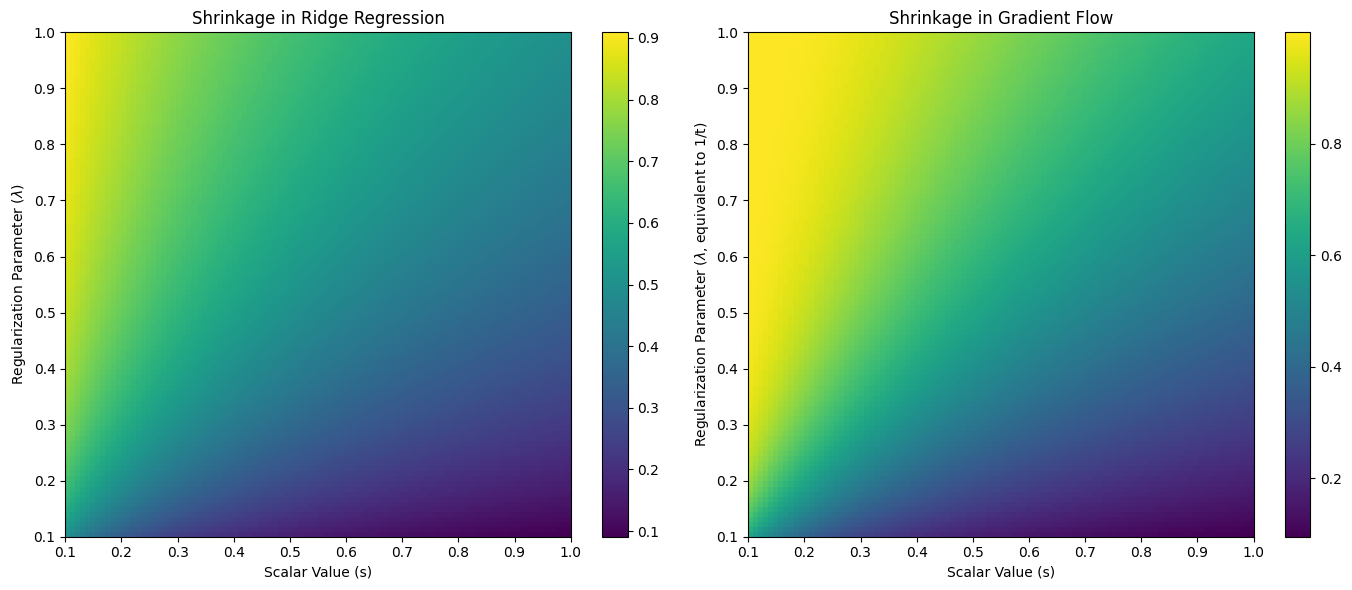

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def shrinkage_ridge(s, reg_param):
    return s / (s + reg_param)

def shrinkage_gradient_flow(s, inv_reg_param):
    return 1 - np.exp(-s * inv_reg_param)

# Vectorized versions of the above functions
vec_shrinkage_ridge = np.vectorize(shrinkage_ridge)
vec_shrinkage_gradient_flow = np.vectorize(shrinkage_gradient_flow)

# Generate grid of points
scalar_range = np.linspace(0.1, 1, 100)
reg_param_range = np.linspace(0.1, 1, 100)

# Apply the vectorized functions
values_ridge = vec_shrinkage_ridge(np.outer(scalar_range, np.ones_like(reg_param_range)), reg_param_range)
values_gradient_flow = vec_shrinkage_gradient_flow(np.outer(scalar_range, np.ones_like(reg_param_range)), 1/reg_param_range)

# Setting up the plots for visualization
figure, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Ridge Regression Shrinkage
heatmap_ridge = axes[0].imshow(values_ridge, extent=[reg_param_range.min(), reg_param_range.max(), scalar_range.min(), scalar_range.max()], aspect='auto', origin='lower')
axes[0].set_title('Shrinkage in Ridge Regression')
axes[0].set_xlabel('Scalar Value (s)')
axes[0].set_ylabel('Regularization Parameter ($\lambda$)')
figure.colorbar(heatmap_ridge, ax=axes[0])

# Plot for Gradient Flow Shrinkage
heatmap_gradient_flow = axes[1].imshow(values_gradient_flow, extent=[reg_param_range.min(), reg_param_range.max(), scalar_range.min(), scalar_range.max()], aspect='auto', origin='lower')
axes[1].set_title('Shrinkage in Gradient Flow')
axes[1].set_xlabel('Scalar Value (s)')
axes[1].set_ylabel('Regularization Parameter ($\lambda$, equivalent to 1/t)')
figure.colorbar(heatmap_gradient_flow, ax=axes[1])

plt.tight_layout()
plt.show()
